## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [117]:
import numpy as np
import pandas as pd

# Завантаження даних
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

# Виведення основної статистичної інформації по числовим змінним
print(data.describe())

# Виведення розмірності датасету
print("Розмірність датасету:", data.shape)


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [118]:
from sklearn.preprocessing import LabelEncoder

# Якщо цільова змінна є категоріальною
# Припустимо, що у нас є стовпець 'deposit', який ми хочемо використовувати як цільову змінну
# Перетворимо його у числовий формат за допомогою LabelEncoder

label_encoder = LabelEncoder()
bank_target = label_encoder.fit_transform(data['age'])


print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [119]:
# Виділення атрибутів, що характеризують клієнтів банку
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

# Вивід унікальних значень для кожного атрибута
for column in bank_client.columns:
    unique_values = bank_client[column].unique()
    print(f"Унікальні значення для {column}:")
    print(unique_values)
    print()


Унікальні значення для age:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Унікальні значення для job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Унікальні значення для marital:
['married' 'single' 'divorced' 'unknown']

Унікальні значення для education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Унікальні значення для default:
['no' 'unknown' 'yes']

Унікальні значення для housing:
['no' 'yes' 'unknown']

Унікальні значення для loan:
['no' 'yes' 'unknown']



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Максимальне значення віку: 98
Мінімальне значення віку: 17
Кількість NaN у стовпці 'Age': 0


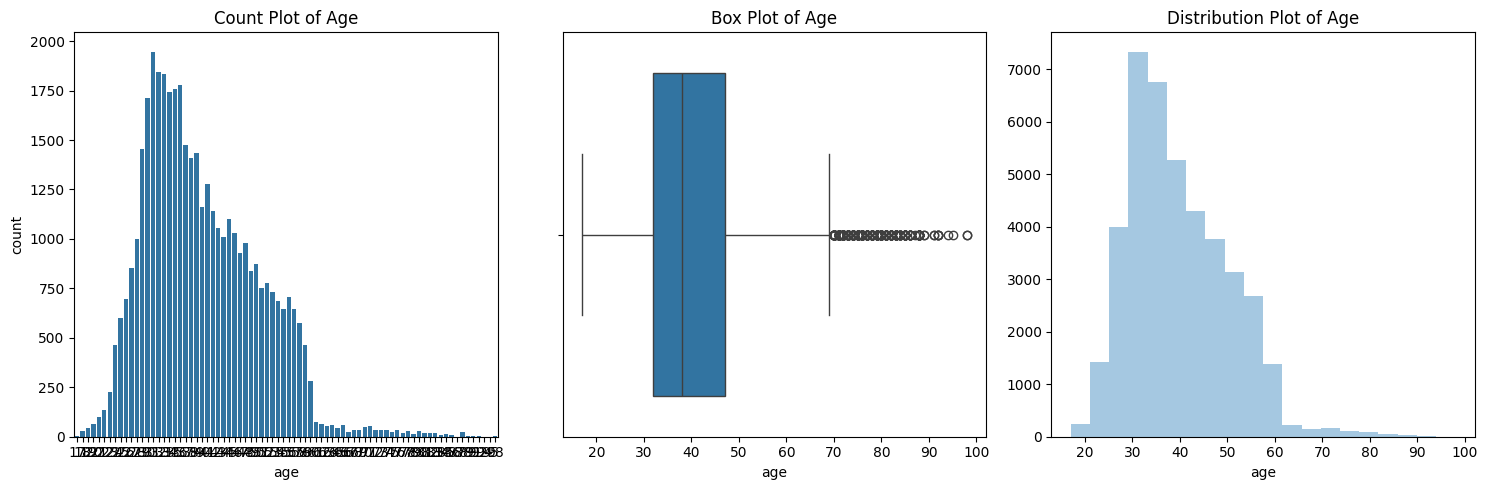

Розподіл на важкі хвости:
Позитивний (праворучній) важкий хвіст.


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вивести максимальне та мінімальне значення
print("Максимальне значення віку:", bank_client['age'].max())
print("Мінімальне значення віку:", bank_client['age'].min())

# Перевірити на наявність NaN
nan_count = bank_client['age'].isna().sum()
print("Кількість NaN у стовпці 'Age':", nan_count)

# Провести візуальний аналіз
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=bank_client, x='age')
plt.title('Count Plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(data=bank_client, x='age')
plt.title('Box Plot of Age')

plt.subplot(1, 3, 3)
sns.distplot(bank_client['age'], bins=20, kde=False)
plt.title('Distribution Plot of Age')

plt.tight_layout()
plt.show()

# Перевірити розподіл на важкі хвости
print("Розподіл на важкі хвости:")
skewness = bank_client['age'].skew()
if skewness > 0:
    print("Позитивний (праворучній) важкий хвіст.")
elif skewness < 0:
    print("Негативний (ліворучний) важкий хвіст.")
else:
    print("Розподіл симетричний.")


**Висновки з 1-4 завдання (детальні)**

Завдання 1: Підготовка даних до опрацювання
1. Завантажили вибірку `bank-additional-full.csv`.
2. Підключили необхідні бібліотеки: `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`, `LabelEncoder` з `sklearn`.
3. Вивели основну статистичну інформацію по числовим змінним (`describe()`).
4. Вивели розмірність датасету (`shape`).

Завдання 2: Підготовка цільової змінної
1. Проаналізували атрибути вибірки і визначили цільовий атрибут, який потім виявився "y".
2. Перетворили цільовий атрибут з категоріального в числовий за допомогою `LabelEncoder`.

Завдання 3: Визначення атрибутів, що характеризують клієнтів банку
1. Виділили атрибути, які характеризують клієнтів банку в окрему частину.
2. Перевірили всі змінні на унікальні значення.

Завдання 4: Аналіз атрибуту `Age`
1. Вивели максимальне та мінімальне значення віку.
2. Перевірили наявність NaN у стовпці `Age`.
3. Провели візуальний аналіз зміної `Age`, побудувавши `countplot`, `boxplot`, `distplot`.
4. Перевірили розподіл по змінній `Age` на важкі хвости.

Загальною метою цих завдань було підготувати дані для подальшого аналізу та моделювання.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [121]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers


In [122]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

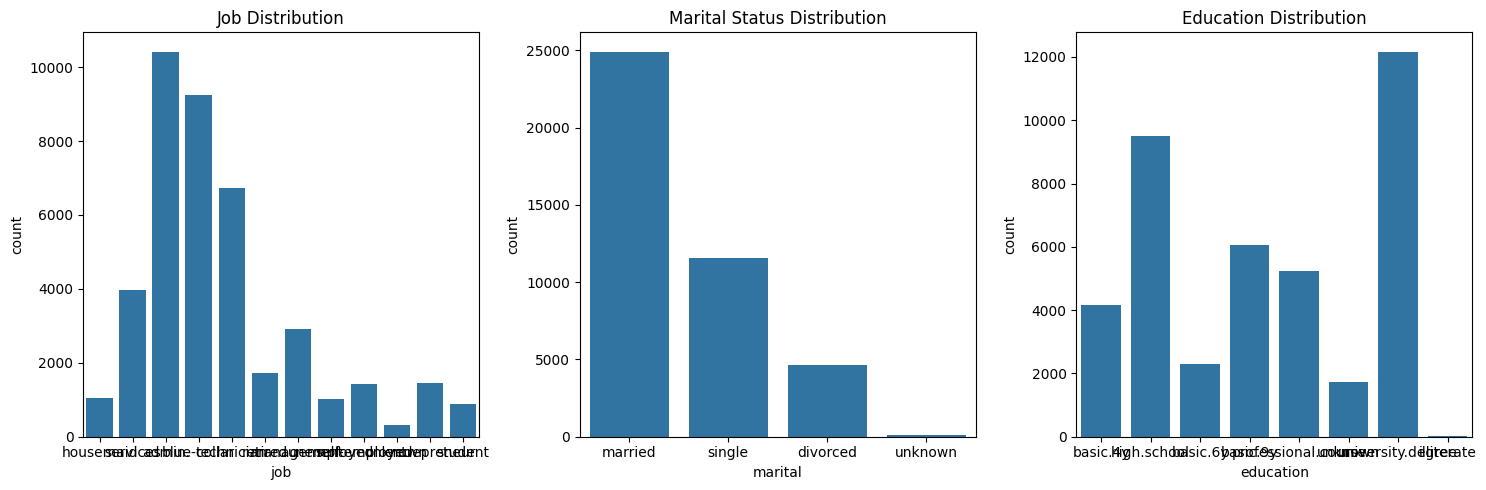

In [123]:
plt.figure(figsize=(15, 5))

# Графік для атрибуту 'job'
plt.subplot(1, 3, 1)
sns.countplot(data=bank_client, x='job')
plt.title('Job Distribution')

# Графік для атрибуту 'marital'
plt.subplot(1, 3, 2)
sns.countplot(data=bank_client, x='marital')
plt.title('Marital Status Distribution')

# Графік для атрибуту 'education'
plt.subplot(1, 3, 3)
sns.countplot(data=bank_client, x='education')
plt.title('Education Distribution')

plt.tight_layout()
plt.show()


**Висновки з завдання 6 (детальні)**

З аналізу графіків розподілу даних за атрибутами `job`, `marital` та `education` можна зробити такі висновки:

1. **Job Distribution (Розподіл за професією)**:
   - Найбільш поширені професії в цьому наборі даних: адміністратор, робітник, технічний спеціаліст та службовець.
   - Частка клієнтів, які працюють в цих професіях, може вказувати на галузі, які є більш представленими серед клієнтів банку.

2. **Marital Status Distribution (Розподіл за сімейним станом)**:
   - Більшість клієнтів є одруженими або мають партнерів.
   - Кількість одружених чи маючих партнерів клієнтів перевищує кількість одиноких.

3. **Education Distribution (Розподіл за освітою)**:
   - Більшість клієнтів мають середню освіту або вищу освіту.
   - Освітній рівень клієнтів може вказувати на їхню фінансову грамотність та можливість використання банківських послуг, які вимагають більш високого рівня розуміння фінансових питань.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

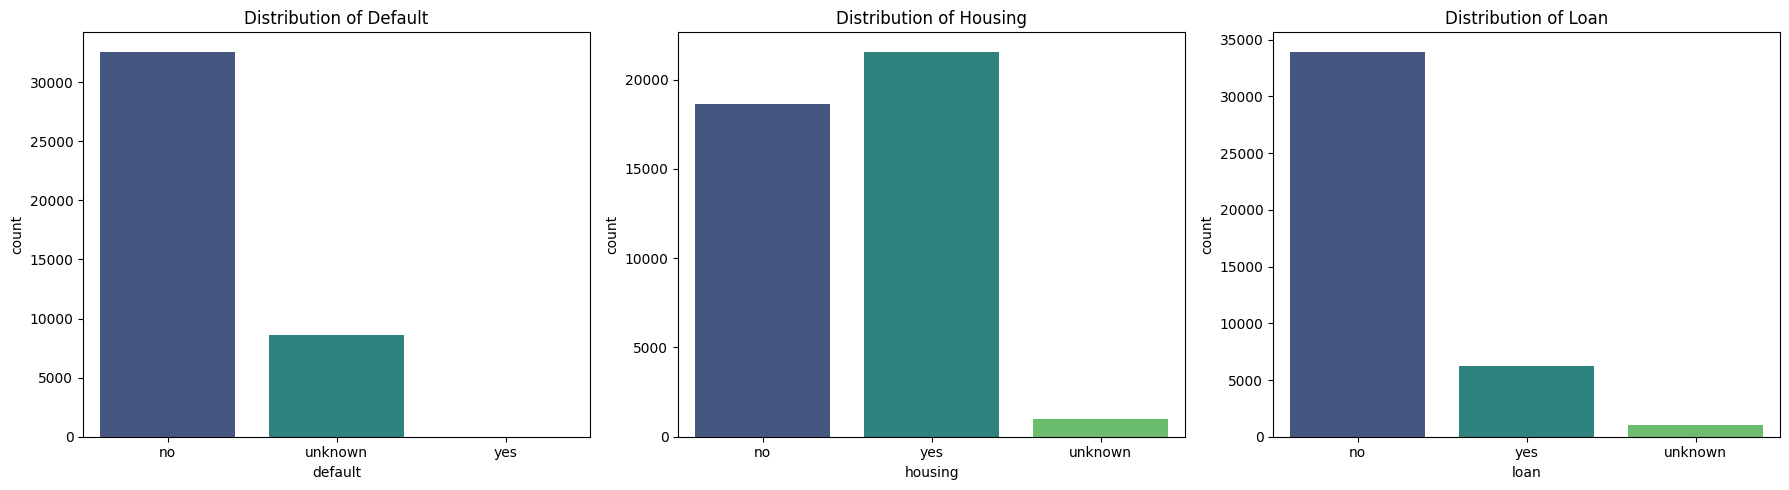

In [124]:
# Побудова графіків розподілу даних для атрибутів default, housing та loan

plt.figure(figsize=(18, 5))

# Графік для атрибуту 'default'
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='default', palette='viridis')
plt.title('Distribution of Default')

# Графік для атрибуту 'housing'
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='housing', palette='viridis')
plt.title('Distribution of Housing')

# Графік для атрибуту 'loan'
plt.subplot(1, 3, 3)
sns.countplot(data=data, x='loan', palette='viridis')
plt.title('Distribution of Loan')

plt.tight_layout()
plt.show()


**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [125]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col].notnull()
        df[col] = le.fit_transform(df[col][not_null])
      
    return df


In [126]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [127]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartile values
    
    dataframe: pd.DataFrame to encode
    age_col: age column to encode
    
    returns: pd.DataFrame with encoded age column
    """
    quartiles = dataframe[age_col].quantile([0.25, 0.5, 0.75])
    dataframe[age_col] = pd.qcut(dataframe[age_col], q=4, labels=False)
    
    return dataframe


In [128]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Після застосування функції `encode_age` відбулося перетворення змінної "Age" на числову змінну, кожне значення якої представляє квартиль, до якого відноситься вік кожного спостереження.

Висновки:
1. Змінна "Age" була перетворена на категоріальну змінну, кожне значення якої вказує на квартильний діапазон віку.
2. Тепер можна використовувати цю змінну для аналізу впливу віку на цільову змінну або для побудови моделей машинного навчання.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [129]:
bank_relat = data[['job', 'marital', 'education', 'default', 'housing', 'loan']]

# Display the dataframe
print(bank_relat.head())

# Check for missing values
print("\nMissing values in bank_relat:")
print(bank_relat.isnull().sum())


         job  marital    education  default housing loan
0  housemaid  married     basic.4y       no      no   no
1   services  married  high.school  unknown      no   no
2   services  married  high.school       no     yes   no
3     admin.  married     basic.6y       no      no   no
4   services  married  high.school       no      no  yes

Missing values in bank_relat:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [130]:
# Унікальні значення для атрибута 'contact'
print("Унікальні значення для атрибута 'contact':")
print(data['contact'].unique())

# Унікальні значення для атрибута 'month'
print("\nУнікальні значення для атрибута 'month':")
print(data['month'].unique())

# Унікальні значення для атрибута 'day_of_week'
print("\nУнікальні значення для атрибута 'day_of_week':")
print(data['day_of_week'].unique())


Унікальні значення для атрибута 'contact':
['telephone' 'cellular']

Унікальні значення для атрибута 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Унікальні значення для атрибута 'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



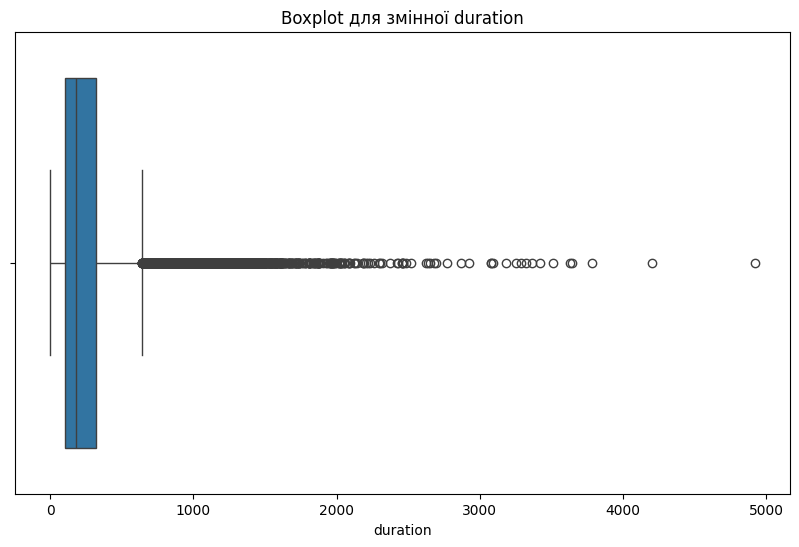

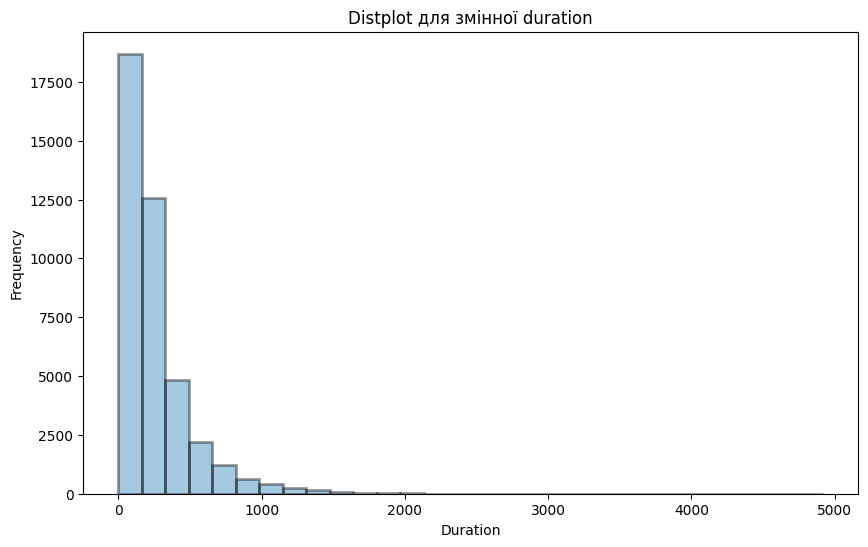

Скішність розподілу: 3.263141255262832
Розподіл має важкий правий хвіст.


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Побудова boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['duration'])
plt.title('Boxplot для змінної duration')
plt.show()

# Побудова distplot
plt.figure(figsize=(10, 6))
sns.distplot(data['duration'], kde=False, bins=30, hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('Distplot для змінної duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Перевірка розподілу на важкі хвости
skewness = data['duration'].skew()
print("Скішність розподілу:", skewness)
if skewness > 1:
    print("Розподіл має важкий правий хвіст.")
elif skewness < -1:
    print("Розподіл має важкий лівий хвіст.")
else:
    print("Розподіл має нормальну форму.")


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [132]:
# Список категоріальних змінних для кодування
categorical_cols = ['contact', 'month', 'day_of_week']

# Кодування категоріальних змінних
data_encoded = encode_categorical_columns(data, categorical_cols)

# Виведення перших рядків для перевірки
print(data_encoded.head())


   age        job  marital    education  default housing loan  contact  month  \
0   56  housemaid  married     basic.4y       no      no   no        1      6   
1   57   services  married  high.school  unknown      no   no        1      6   
2   37   services  married  high.school       no     yes   no        1      6   
3   40     admin.  married     basic.6y       no      no   no        1      6   
4   56   services  married  high.school       no      no  yes        1      6   

   day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0            1  ...         1    999         0  nonexistent          1.1   
1            1  ...         1    999         0  nonexistent          1.1   
2            1  ...         1    999         0  nonexistent          1.1   
3            1  ...         1    999         0  nonexistent          1.1   
4            1  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [133]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column

    df: pd.DataFrame to encode
    duration_col: duration col to encode
    """

    # Отримання квартильних значень
    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].quantile(0.5)
    Q3 = dataframe[duration_col].quantile(0.75)

    # Трансформація значень
    dataframe.loc[dataframe[duration_col] <= Q1, duration_col] = 1
    dataframe.loc[(dataframe[duration_col] > Q1) & (dataframe[duration_col] <= Q2), duration_col] = 2
    dataframe.loc[(dataframe[duration_col] > Q2) & (dataframe[duration_col] <= Q3), duration_col] = 3
    dataframe.loc[dataframe[duration_col] > Q3, duration_col] = 4

    return dataframe

# Виклик функції для трансформації змінної duration
data = encode_duration(data, 'duration')

# Виведення перших рядків для перевірки
print(data.head())


   age        job  marital    education  default housing loan  contact  month  \
0   56  housemaid  married     basic.4y       no      no   no        1      6   
1   57   services  married  high.school  unknown      no   no        1      6   
2   37   services  married  high.school       no     yes   no        1      6   
3   40     admin.  married     basic.6y       no      no   no        1      6   
4   56   services  married  high.school       no      no  yes        1      6   

   day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0            1  ...         1    999         0  nonexistent          1.1   
1            1  ...         1    999         0  nonexistent          1.1   
2            1  ...         1    999         0  nonexistent          1.1   
3            1  ...         1    999         0  nonexistent          1.1   
4            1  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [134]:
bank_relat = encode_duration(df, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [135]:
bank_socec = bank_relat[['job', 'marital', 'education', 'default', 'housing', 'loan']]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [136]:
other_attributes = ['campaign', 'pdays', 'previous', 'poutcome']
bank_other = bank_relat[other_attributes].copy()


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [137]:
from sklearn.preprocessing import LabelEncoder

# Ініціалізуємо LabelEncoder
label_encoder = LabelEncoder()

# Застосовуємо Label Encoding до атрибуту poutcome
bank_other['poutcome'] = label_encoder.fit_transform(bank_other['poutcome'])


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [138]:
# З'єднання всіх блоків даних в один датафрейм
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)

# Вивід першіх кількох рядків датафрейму для перевірки
print(bank_final.head())

# Перевірка наявності тільки потрібних для моделювання колонок
print(bank_final.columns)


   age job marital education default housing loan  age        job  marital  \
0    3   3       1         0       0       0    0   56  housemaid  married   
1    3   7       1         3       1       0    0   57   services  married   
2    1   7       1         3       0       2    0   37   services  married   
3    2   0       1         1       0       0    0   40     admin.  married   
4    3   7       1         3       0       0    2   56   services  married   

   ...        job  marital    education  default housing loan campaign  pdays  \
0  ...  housemaid  married     basic.4y       no      no   no        1    999   
1  ...   services  married  high.school  unknown      no   no        1    999   
2  ...   services  married  high.school       no     yes   no        1    999   
3  ...     admin.  married     basic.6y       no      no   no        1    999   
4  ...   services  married  high.school       no      no  yes        1    999   

   previous  poutcome  
0         0         

**Завдання 19** Провести ділення вибірки

In [143]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        if df[col].isnull().any():
            raise ValueError(f"Column {col} contains missing values")
        
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df


## Логістична Регресія

In [153]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Функція для кодування категоріальних змінних
def encode_categorical_columns(X_train: pd.DataFrame, X_test: pd.DataFrame, categorical_cols: list) -> (pd.DataFrame, pd.DataFrame):
    """
    Function for encoding categorical features using OneHotEncoder
    
    X_train: pd.DataFrame with training features
    X_test: pd.DataFrame with testing features
    categorical_cols: specified columns to encode
    
    returns: (pd.DataFrame, pd.DataFrame) with encoded values
    """
    # Перевірка наявності колонок у датафреймах
    for col in categorical_cols:
        if col not in X_train.columns:
            raise ValueError(f"Column '{col}' is not a column of the dataframe.")
        if col not in X_test.columns:
            raise ValueError(f"Column '{col}' is not a column of the dataframe.")
    
    # Використовуємо ColumnTransformer для кодування категоріальних змінних
    preprocessor = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
        remainder='passthrough'
    )
    
    # Побудова пайплайну
    pipe = Pipeline(steps=[('preprocessor', preprocessor)])
    
    # Кодування категоріальних змінних
    X_train_encoded = pipe.fit_transform(X_train)
    X_test_encoded = pipe.transform(X_test)
    
    return X_train_encoded, X_test_encoded

# Кодування категоріальних змінних
X_train_encoded, X_test_encoded = encode_categorical_columns(X_train, X_test, categorical_cols)

# Побудова моделі логістичної регресії
logmodel = LogisticRegression() 
logmodel.fit(X_train_encoded, y_train)
logpred = logmodel.predict(X_test_encoded)

# Оцінка моделі
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test_encoded, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean())


ValueError: Column 'contact' is not a column of the dataframe.

## k-NN

In [156]:
# Знайти категоріальні змінні у X_train
categorical_cols_X_train = X_train.select_dtypes(include=['object']).columns.tolist()

# Кодування категоріальних змінних у X_train
X_train_encoded = encode_categorical_columns(X_train, categorical_cols_X_train)

# Знайти категоріальні змінні у y_train (якщо вони є)
categorical_cols_y_train = y_train.select_dtypes(include=['object']).columns.tolist()

# Кодування категоріальних змінних у y_train (якщо вони є)
if categorical_cols_y_train:
    y_train_encoded = encode_categorical_columns(y_train, categorical_cols_y_train)
else:
    y_train_encoded = y_train

# Тепер використовуйте X_train_encoded та y_train_encoded для моделі


TypeError: encode_categorical_columns() missing 1 required positional argument: 'categorical_cols'

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(#your code)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## Логістична Регресія

In [ ]:
models = pd.DataFrame({
                'Models': #code,
                'Score':  #code]})

models.sort_values(by='Score', ascending=False)

**Висновки по моделям (детальні)**

1.   
2.   
3. ...